In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dataset = r"C:\Users\gowth\OneDrive\Desktop\nnld lab\datasets\housing.csv"
data = pd.read_csv(dataset)

X = data[['median_income', 'total_rooms']].values
y = data['median_house_value'].values  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, verbose=0)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

predictions = model.predict(X_test)
print("Predictions (first 10):", predictions.flatten()[:10])
print("Actual values (first 10):", y_test[:10])


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Absolute Error: 62858.97265625
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
Predictions (first 10): [113881.37 148998.2  189540.92 285883.56 199933.77 242272.62 257905.77
 198430.98 245978.02 386404.38]
Actual values (first 10): [ 47700.  45800. 500001. 218600. 278000. 158700. 198200. 157500. 340000.
 446600.]


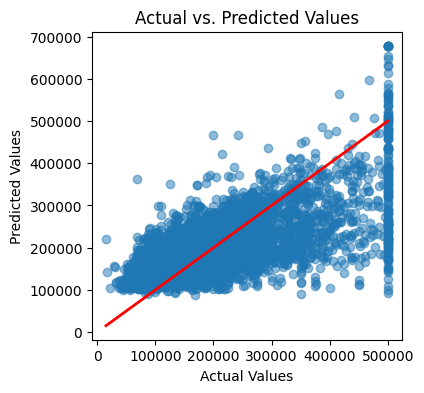

In [5]:

# Plot the results
plt.figure(figsize=(4, 4))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()